# Bayesian Learning

This lab introduces you to a <b style="color:lightgreen">Bayesian/probabilistic perspective of Machine Learning</b>. In order to have full information about the underlying distributions, we will be using <b style="color:Sienna">synthetic datasets</b>, i.e. <b style="color:Sienna">datasets</b> that we sample from distributions that we define explicitly ourselves.

These data sets will be used to perform a <b style="color:lightgreen">Bayesian linear regression</b>. We are looking at the <b style="color:lightgreen">Maximum-a-posteriori (MAP)</b> estimate and the <b style="color:cornflowerblue">posterior distribution</b> of the model parameters. In order to keep it simple, we restrict ourselves to one-dimensional input spaces.

#### Preamble

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
#css_styling()

<a id="id"></a>
## 1. Synthetic dataset for linear regression

We model the conditional distribution ${\color{Cornflowerblue}p}({\color{Gold}y} \mid {\color{Gold}x})$ given the marginal distribution ${\color{Cornflowerblue}p}({\color{Gold}x})$ on ${\color{Sienna}\mathbb{R}}$ and a function ${\color{Cornflowerblue}f}: {\color{Sienna}\mathbb{R}} \rightarrow {\color{Sienna}\mathbb{R}}$  as follows:

$$ {\color{Cornflowerblue}p}({\color{Gold}y} \mid {\color{Gold}x}) = {\color{Cornflowerblue}f}({\color{Gold}x}) + {\color{Tomato}\epsilon} \qquad \left({\color{Tomato}\epsilon} \sim \mathcal{\color{Cornflowerblue}N}(0, {\color{Tomato}\sigma}^2)\right), $$

where ${\color{Tomato}\epsilon} \sim \mathcal{\color{Cornflowerblue}N}(0, {\color{Tomato}\sigma}^2)$ means that ${\color{Tomato}\epsilon}$ is a random variable normally distributed with zero mean and a variance of ${\color{Tomato}\sigma}^2$. Note that ${\color{Cornflowerblue}f}$ actually only has to be defined for $x$ with nonzero probability (this <b style="color:Sienna">set</b> of ${\color{Gold}x}$ is called the **support of** ${\color{Cornflowerblue}p}$). Thus, we have fully specified the <b style="color:cornflowerblue">joint distribution</b> ${\color{Cornflowerblue}p}({\color{Gold}y}, {\color{Gold}x}) = {\color{Cornflowerblue}p}({\color{Gold}x}) {\color{Cornflowerblue}p}({\color{Gold}y} \mid {\color{Gold}x})$.

The function ${\color{Cornflowerblue}f}$ controls the relationship between ${\color{Gold}x}$ and ${\color{Gold}y}$. For example, if we use a <b style="color:cornflowerblue">linear function</b> for ${\color{Cornflowerblue}f}$, there will be a linear relationship between ${\color{Gold}x}$ and ${\color{Gold}y}$ (plus some noise); hence, in this case, a linear regression model will be adequate to predict ${\color{Gold}y}$ from ${\color{Gold}x}$. 

To generate a data set ${\color{Sienna}D} = \{({\color{Gold}x}_{\color{PaleVioletRed}i}, {\color{Gold}y}_{\color{PaleVioletRed}i}) \in {\color{Sienna}X} \times {\color{Sienna}Y} \mid 1 \leq {\color{PaleVioletRed}i} \leq {\color{Tomato}N}\}$ we sample tuples $({\color{Gold}x}, {\color{Gold}y})$ by first picking an ${\color{Gold}x}$ from the <b style="color:cornflowerblue">distribution</b> ${\color{Cornflowerblue}p}({\color{Gold}x})$. To compute the ${\color{Gold}y}$, we sample a noise-term ${\color{Tomato}\epsilon}$ from the <b style="color:cornflowerblue">normal distribution</b> with the specified mean $={\color{Tomato}\mu}$ and variance $={\color{Tomato}\sigma}^2$, and compute ${\color{Gold}y}={\color{Cornflowerblue}f}({\color{Gold}x}) + {\color{Tomato}\epsilon}$. The output $({\color{Gold}x}, {\color{Gold}y})$ is then one sample of our <b style="color:Sienna">data set</b>. Since we sample independently and identically distributed (**i.i.d.**) we do this process ${\color{Tomato}N}$ times to obtain ${\color{Sienna}D}$.

As ground work we first learn about the <a href="http://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats</a> package, which contains distributions to sample from or computing quantities such as the `probability density function (pdf)`, and about Python generators.

#### `Initialization`
First import the uniform and normal distributions.

In [2]:
from scipy.stats import uniform
from scipy.stats import norm
# Models uniform distribution on the interval [loc, loc+scale]
b = uniform(loc=0, scale=4)
print ("10 samples: {}".format(b.rvs(10)))
print ("Probablity density at x = 0: {}".format(b.pdf(0)))

10 samples: [0.88941622 0.34411318 3.40708701 0.7796304  1.23031091 2.23780841
 0.03291026 0.40571622 3.34242198 3.82937748]
Probablity density at x = 0: 0.25


#### `Plotting normal distribution`
In the following code snippet we are sampling from a standard normal distribution and look at the distribution of the samples.

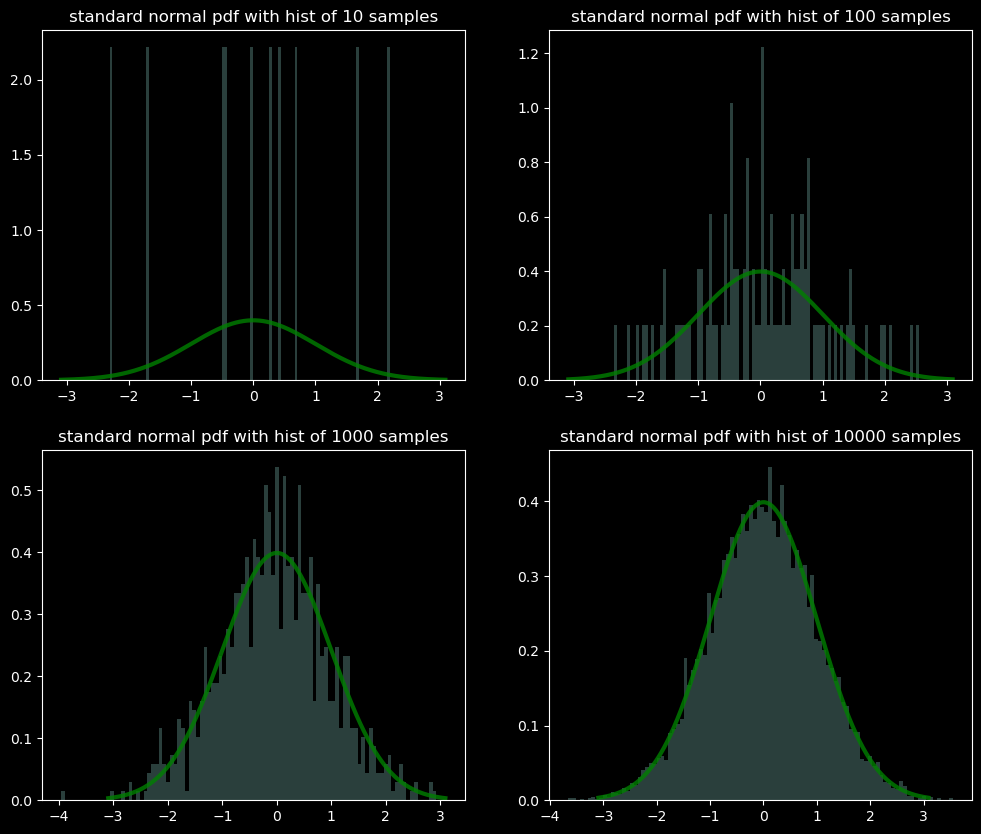

In [3]:
a = norm(loc=0, scale=1)

plt.style.use('dark_background')
# this creates a grid of 2x2 plots
# axes is then a 2x2 np.ndarray
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# sample 1000 points from the 0.01 percentile to 0.99 percentile
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000) 

num_samples = [10, 100, 1000, 10000]
# we go through the axes one by one, need to make the 2x2 matrix linear before
for i, ax in enumerate(axes.reshape(4)):
    normal_dist = norm(loc=0, scale=1)
    ax.plot(x, normal_dist.pdf(x), 'g', lw=3, alpha=.8)
    
    ys = normal_dist.rvs(size=num_samples[i])
    ax.hist(ys, density=True, bins=100, histtype="stepfilled", alpha=0.3)
    ax.set_title('standard normal pdf with hist of {} samples'.format(num_samples[i]))

### Generators
<b style="color:cornflowerblue">Generators</b> are a special kind of <b style="color:cornflowerblue">functions</b> in Python. Instead of returning only a single value, they behave like an iterator, i.e.,  return a (possibly infinite) sequence of values. Syntactically, the only difference between a <b style="color:cornflowerblue">normal function</b> and a <b style="color:cornflowerblue">generator</b> is that a <b style="color:cornflowerblue">generator</b> uses the `yield` keyword rather than `return`. Once `yield` is used in the definition of a <b style="color:cornflowerblue">function</b>,  the `next()` method is generated automatically. Each time, the generator's `next()` method is called, the <b style="color:cornflowerblue">generator function</b> is executed until the `yield` keyword is reached. Similar to `return`, it returns the value given as parameter. If the generator is told to generate more values (using `next()`), the execution continues from the point of the last call of `yield`. Typically, `yield` is inside a (usually infinite) loop.  As an example, we write a generator that generates the natural numbers ${\color{Sienna}\mathbb{N}}_0$, i.e. $0, 1, 2, \dots$.

#### `natural_numbers()`

In [4]:
def natural_numbers():
    i = 0
    
    while True: # infinite loop!
        yield i
        i += 1

In [5]:
gen = natural_numbers()
print (type(gen))
print (next(gen))
print ([next(gen) for i in range(100)]) # take 100 numbers, note that 0 was already generated!

<class 'generator'>
0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


### Exercise 1: Complete the code of the following three generators:

In [63]:
#rng = np.random.default_rng(1235)

#rng.integers(low=0, high=10)
#print(2*np.pi)

In [2]:
##gen = uniform_generator(0, 10)
#print (next(gen))
#print (next(gen))
#print (next(gen))
##y= ([next(gen) for i in range(100)])

##gen = normal_generator(0, 1)

#plt.figure()
#plt.hist(y, density=True, bins=100, histtype="stepfilled")
##y = ([next(gen) for i in range(1000)])

#plt.figure()
#plt.hist(y, density=True, bins=100, histtype="stepfilled")

##def constant_generator(c):
##        while True:
##            yield c

##data_gen = data_generator(lambda x: x**2, uniform_generator(-1, 1), constant_generator(0))

#print(next(data_gen))
#print(next(data_gen))

#y = ([next(data_gen) for i in range(1000)])
##print(list(itertools.islice(data_gen, 0, 100)))
#print(y)
##assert all([x**2 == y for x, y in (itertools.islice(data_gen, 0, 100))]), "The data generator"

#### `uniform_gen(a,b)`
Generates a randomly sampled element ${\color{Gold}y}$ from a uniform distribution with boundaries ${\color{Tomato}a}$ and ${\color{Tomato}b}$. Assert that ${\color{Tomato}a} < {\color{Tomato}b}$.
For generation a uniform distributed ${\color{Gold}y}$ variable use this formula:

$${\color{Gold}y} = {\color{Tomato}a} + \frac{{\color{Gold}x}}{{\color{Tomato}N}_{\mathrm{max}}}({\color{Tomato}b}-{\color{Tomato}a}) \; ,
$$

where ${\color{Gold}x}$ is a random variable from the system randomizer and ${\color{Tomato}N}_{\mathrm{max}}$ is the maximal number of the randomized variable ${\color{Gold}x}$.

In [6]:
def uniform_generator(a, b):
    ##############################
    #### INSERT YOUR CODE HERE ###
    ##############################
    assert b > a, "b greater than a expected"
    #rng = np.random.default_rng(12345)

    #rints = rng.integers(low=0, high=10, size=3)
    while True: # infinite loop!
        # nMin + ((rand() / (RAND_MAX) * (nMax-nMin))
        rng = np.random.default_rng()

        #rints = rng.integers(low=0, high=10)
        rints = rng.random()
        yield a + (rints / (1) * (b - a))

#### `normal_gen(mean, sigma)`
Generates a randomly sampled element from a normal distribution with `mean`$={\color{Tomato}\mu}$ and standard deviation `sigma`$={\color{Tomato}\sigma}={\color{Cornflowerblue}\sqrt{\color{Tomato}V}}$ (${\color{Tomato}V}={\color{Tomato}\sigma}^2$ variance). Assert that ${\color{Tomato}\sigma} \geq 0$. For generation of a normal distributed variable ${\color{Gold}y}$ use the box-muller algorithm. We need two auxilary variables ${\color{Gold}u}_1, {\color{Gold}u}_2$, which are uniform distributed and then we get for two normal distributed variables ${\color{Gold}y}_1, {\color{Gold}y}_2$ the formula:

$$
{\color{Gold}y}_1={\color{Tomato}\sigma}{\color{Cornflowerblue}\sqrt{\color{white}(-2{\color{Cornflowerblue}\log}({\color{Gold}u}_1)}}{\color{Cornflowerblue}\cos}(2\pi {\color{Gold}u}_2)+{\color{Tomato}\mu}
$$
$$
{\color{Gold}y}_2={\color{Tomato}\sigma}{\color{Cornflowerblue}\sqrt{\color{white}(-2{\color{Cornflowerblue}\log}({\color{Gold}u}_1)}}{\color{Cornflowerblue}\sin}(2\pi {\color{Gold}u}_2)+{\color{Tomato}\mu}
$$

In [7]:
def normal_generator(mean, sigma):
    ##############################
    #### INSERT YOUR CODE HERE ###
    ##############################


    assert sigma > 0, "sigma greater than 0 expected"

    gen = uniform_generator(0, 1)
    gen2  = uniform_generator(0, 1)
    while True: # infinite loop! 
        u1 = next(gen)
        u2 = next(gen2)
        yield sigma*np.sqrt(-2.0*np.log(u1))*np.cos(2.0*np.pi*u2)+mean

#### `data_gen(f, x_gen, noise_gen)`
Generates data points $({\color{Gold}x}, {\color{Gold}y})$, where ${\color{Gold}x}$ is assumed to be sampled using a generator function `x_gen` and 

$$
{\color{Gold}y}={\color{Cornflowerblue}f}({\color{Gold}x}) + {\color{Tomato}\epsilon} \; ,
$$

where `eps`$={\color{Tomato}\epsilon}$ is assumed to be sampled using a <b style="color:cornflowerblue">generator function</b> `noise_gen` ([see introduction above](#id)). 
>> You don't need to implement the two generator functions for x and eps here. 

In [8]:
def data_generator(f, x_gen, noise_gen):
    ##############################
    #### INSERT YOUR CODE HERE ###
    ##############################
    while True: # infinite loop!
        x = next(x_gen)
        yield x, f(x)+next(noise_gen)

#### `Code` Test the generators

In [9]:
import itertools
from scipy.stats import normaltest
    
try: 
    num_gen = uniform_generator(1, 5)
    numbers = [next(num_gen) for _ in range(1000)]
    
    assert all(1 <= num and num <= 5 for num in numbers), "The uniform generator"
    
    normal_gen = normal_generator(0, 1)
    numbers_normal = [next(normal_gen) for _ in range(1000)]
    
    k2, p = normaltest(numbers_normal)
    #print(normaltest(numbers_normal))
    assert p > 1e-3, "The normal generator"
   
    def constant_generator(c):
        while True:
            yield c

    data_gen = data_generator(lambda x: x**2, uniform_generator(-1, 1), constant_generator(0))
    
    assert all([x**2 == y for x, y in itertools.islice((data_gen), 0, 1000)]), "The data generator"
    
    print ("The code seems fine.")
    
except AssertionError as err:
    print ("Currently there is a fault in: " + str(err))

The code seems fine.


## 2. <b style="color:lightgreen">Bayesian linear regression</b> - <b style="color:cornflowerblue">Posterior Distribution</b> of ${\color{Tomato}\theta}_{\text{MAP}}$ and MAP

We now perform a <b style="color:lightgreen">Bayesian linear regression</b> on data that is generated as explained in the introduction above. ${\color{Gold}x}$ is sampled from a <b style="color:cornflowerblue">uniform distribution</b> with lower bound 0 and upper bound 5. The label ${\color{Gold}y}$ of an instance ${\color{Gold}x}$ is generated via ${\color{Cornflowerblue}f}({\color{Gold}x}) = 5{\color{Gold}x} + 3$ plus some <b style="color:cornflowerblue">normally distributed noise</b> `eps`$={\color{Tomato}\epsilon} \sim \mathcal{\color{Cornflowerblue}N}(0, {\color{Tomato}\sigma}^2)$ that has a standard deviation of ${\color{Tomato}\sigma}=2.5$.
$$
{\color{Gold}y}={\color{Cornflowerblue}f}({\color{Gold}x}) + {\color{Tomato}\epsilon} \;
$$

#### `Code`: Data generation

In [10]:
sigma   = 2.5 # sigma of the noise, do not change this!

data_gen = data_generator(lambda x: 5*x + 3, uniform_generator(0, 5), normal_generator(0, sigma))
data = list(itertools.islice(data_gen, 0, 100)) # list of pairs (x, y)
#print(data)
x, y = zip(*data) # The asterisk unpacks data; i.e., this line corresponds to x,y=zip((x[0], y[0]), ((x[1], y[1])), ...)

#### `Code` adding Bias
We also add a bias. More precisely we extend the vector ${\color{Gold}x}$ to a matrix by writing it as a column and adding a vector of $1$ next to it.

$$
\tilde{\color{Gold} y}=\left\{ {\color{Gold}y}, 1 \right\} \;
$$

In [11]:
N = len(x)
X = np.column_stack((np.asarray(x), np.ones(N)))

#### `Code`: Plotting data generation

Text(0.5, 1.0, 'Sampled data set')

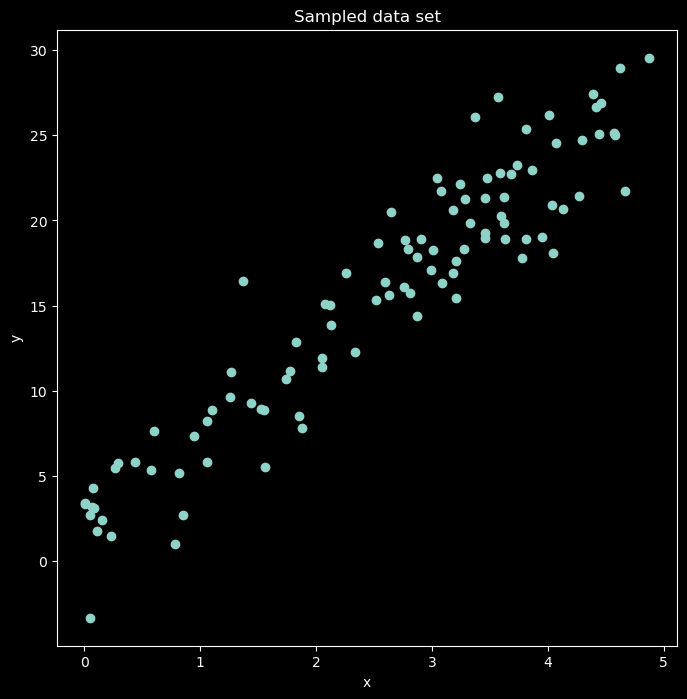

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Sampled data set")

### Exercise 2:
Let ${\color{Sienna}X}$ be a data matrix with dimensions ${\color{Sienna}N} \times {\color{Sienna}D}$,  ${\color{Gold}y}$ a label vector of dimension ${\color{Sienna}D}$. Moreover, let ${\color{Tomato}\sigma}$ be a noise parameter  (standard deviation of the output noise) and ${\color{Tomato}\sigma}_p$ the standard deviation for the prior distribution of the weights ${\color{Tomato}\theta}$. Implement the missing parts of the following functions:

#### `get_MAP`
Returns the MAP estimate ${\color{Tomato}\theta}_{\text{MAP}}$ given ${\color{Sienna}X}, {\color{Gold}y}, {\color{Tomato}\sigma}, {\color{Tomato}\sigma}_p$.

$$ {\color{Tomato}\theta}_{\text{MAP}} = \left({\color{Sienna}X}^T {\color{Sienna}X} + \frac{{\color{Tomato}\sigma}^2}{{\color{Tomato}\sigma}_p^2} {\color{Cornflowerblue}I}\right)^{-1} {\color{Sienna}X}^T {\color{Gold}y}. $$


In [13]:
def get_MAP(X, y, sigma, sigma_p):
    ##############################
    #### INSERT YOUR CODE HERE ###
    ##############################
    return np.dot( np.linalg.inv(np.dot(X.T, X) + sigma**2 / sigma_p**2 * np.identity(len(X.T))), np.dot(X.T, y) ) #theta_MAP

#### `get_posterior_distribution_parameters`
Returns the mean vector (equal to the MAP estimate) and the covariance matrix ${\color{Sienna}\Sigma} $ for the posterior distribution of ${\color{Tomato}\theta}$ given ${\color{Sienna}X}$ and ${\color{Gold}y}$.

$$ {\color{Sienna}\Sigma} = \frac{1}{{\color{Tomato}\sigma}^2} {\color{Sienna}X}^T {\color{Sienna}X} + \frac{1}{{\color{Tomato}\sigma}_p^2} {\color{Cornflowerblue}I}. $$

In [14]:
def get_posterior_distribution_parameters(X, y, sigma, sigma_p):
    ##############################
    #### INSERT YOUR CODE HERE ###
    ##############################
    return get_MAP(X, y, sigma, sigma_p), 1/sigma**2 * np.dot(X.T, X) + 1/sigma_p**2 * np.identity(len(X.T)) # theta_MAP, covariance_matrix

#### `Code` Test `get_MAP` function

In [15]:
sigma_p = 5

theta_MAP = get_MAP(X, y, sigma=sigma, sigma_p=sigma_p)
print("theta (MAP estimate): {}".format(theta_MAP))

theta (MAP estimate): [5.26192987 2.13759779]


### Calculation of the ${\color{Tomato}\theta}_{\text{MAP}}$ and plotting the curves
To use multivariate normal distributions, a different distribution has to be imported from `scipy.stats`. We visualize the posterior distribution of the weights.

#### `generate_contour(mvn, ax)`

In [16]:
def generate_contour(mvn, ax):
    a, b = np.mgrid[4:6:.01, 1.5:4:.01]
    pos = np.dstack((a, b))
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    ax.contourf(a, b, mvn.pdf(pos))

#### `Code` generate parameters and plotting of them

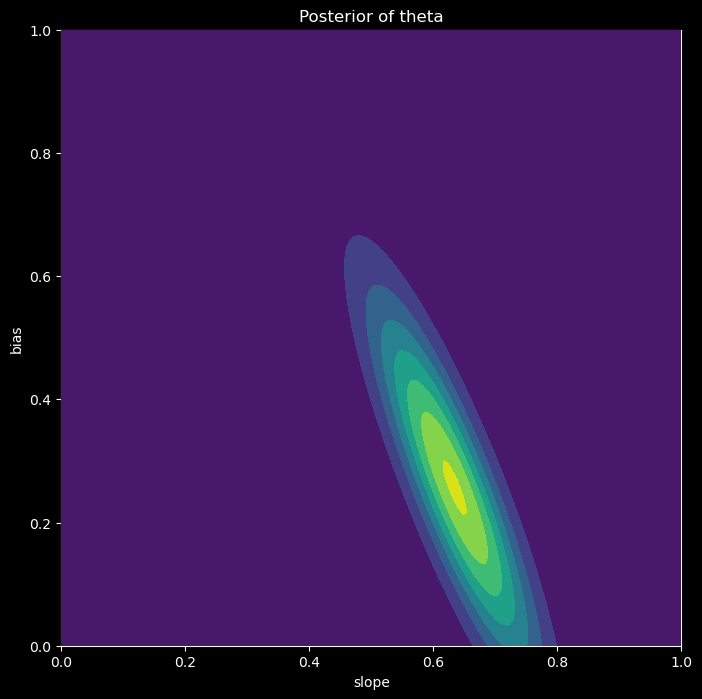

In [17]:
import warnings
#from matplotlib.cbook import mplDeprecation
from scipy.stats import multivariate_normal

theta_MAP, Sigma = get_posterior_distribution_parameters(X, y, sigma, sigma_p)

mvn = multivariate_normal(theta_MAP,np.linalg.inv(Sigma))
thetas = mvn.rvs(5)

generate_contour(mvn, ax)
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title("Posterior of theta")
ax.set_xlabel("slope")
ax.set_ylabel("bias")
generate_contour(mvn, ax)

#### `Code` visualize MAP and posterior curves
We visualize the MAP estimate and sample posterior curves.

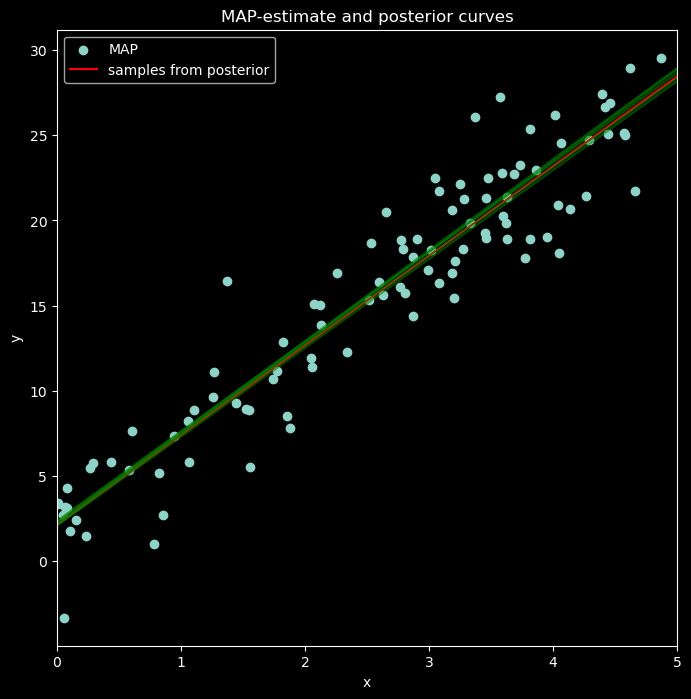

In [18]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("MAP-estimate and posterior curves")

ps = np.linspace(0, 5, 1000)

def predict(theta):
    return lambda x: theta[0] * x + theta[1]

plt.plot(ps, list(map(predict(theta_MAP), ps)), "r-", label="MAP")

for theta in thetas:
    plt.plot(ps, list(map(predict(theta), ps)), "g-", alpha=0.6)
plt.legend(["MAP", "samples from posterior"], loc="best")
plt.xlim([0, 5])
plt.show()